<a href="https://colab.research.google.com/github/CarlaFFochs/Udemy_Projects/blob/main/2_Choose_the_right_estimator_algoritm_for_our_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2.Choosing the right estimator/algoritm for your problem

Some things to note:

* Sklearn refers to ML models, algorithms as estimators.
* Classification problem - predicting a category (heart disase or not)
  * Sometimes you'll see 'clf' (short for classifier') used as a classification estimator
* Regression problem - predicting a number (selling price of a car) 

In [3]:
#Consultar (alla podem saber quin model escollor): Sklearn machine learning model map --> 

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Toys/ Real worda data sets for practicing  --> https://scikit-learn.org/stable/datasets/toy_dataset.html

## 2.1 Picking a ML Model for a regression problem 

Let's use California data set

In [4]:
import pandas as pd
import numpy as np

In [5]:
#Get California Housing fata set
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars

In [6]:
#We can see that it's a dictionary
#We want to use the FEATURES to predict the TARGET

#Create a DataFrame with the data & feature_names

housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [7]:
housing_df.shape

(20640, 8)

In [8]:
#We have to create a column within the DataFrame "housing_df" with the data that is in "housing", within "target"

housing_df["MedHouseVal"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
housing_df.shape

(20640, 9)

In [10]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [11]:
housing_df.drop("MedHouseVal", axis = 1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [12]:
#Split out data into FEATURES and TARGET

 #Import algorithm/estimator --> We search scikit learn ML model map
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

 #Setup random seed
np.random.seed(42)

#Create the data
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]   #median house price in ~100,000$

#Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

#Check the score of the model (on the test set)
model.score(X_test, y_test)

0.9999999942037785

In [13]:
#Return the Coefficient of Determination --> We can google it
#How strong is the relationship between two variables
#For this reason the 0,99 is taking the relationship between the features and target

#Higher value is 1 (h--> how predictive the features (X) of the target value (y)

We can try another METHOD  --> https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

We will try a different Model

In [14]:
#althought our result was really goof

What if "Ridge" didn't work ?

Ensemble methods is to **combine the predicitons** of several base estimators built with a given learning algorithm in order to improve generalizability / robustness of a model --> https://scikit-learn.org/stable/modules/ensemble.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


In [15]:
#Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

#Setup random seed
np.random.seed(42)

#Create the data 
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2)

#Create random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

#Check the score of the model (on the test set)
model.score(X_test, y_test)

0.999999302094669

##2.1 Picking a ML Model for a classifiaction model

In [16]:
#Choose a model to practice --> Toy data sets

##2.2 Choosing an estimator for classification problem

Let's goo to the map....https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [17]:
heart_disease = pd.read_csv("/content/drive/MyDrive/MASTER DATA SCIENCE/M0/M0 - UDEMY/Machine Learning/Typical Workflow Sklearn/data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
heart_disease.shape

(303, 14)

In [20]:
len(heart_disease) #we check the lenght of the data in order to pick the model
#We've arrived to the "Linear SVC" (answering the questions of the map)

303

In [21]:
#Import the LinearSVC estimator class
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

#Set up random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2)


#Instantiate LInearSVC
clf = LinearSVC(max_iter=10000) #we include max_iter as it appears a warining
clf.fit(X_train, y_train)

#Evaluate LinearSVC()
clf.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.8688524590163934

In [22]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [23]:
#if we were guessing if it would have heart_disesase or not, we will have a 86,68% of accuracy 
#there are only 2 clases
#in the example of Udemy, it gives a score of 50%

In [24]:
#Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Set up random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2)


#Instantiate RandomForestClassifier
clf = RandomForestClassifier() 
clf.fit(X_train, y_train)

#Evaluate RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

In [25]:
#it performs worst than before

**Tidbit**:
  1. If you have **structured data,** use **ENSEMBLE METHODS**
  2. If you have **unstructured data**, use **DEEP LEARINING** or **TRANSFER LEARNING**

In [26]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 3.Fit the model/algorithm on our data and use it to make predictions

##3.1 Fitting the model to the data

Diferent names for:
* "X" = features, features variables, data
* "y" = labels, targets, target variables

In [27]:
#Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#Set up random seed
np.random.seed(42)

#Make the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2)


#Instantiate RandomForestClassifier
clf = RandomForestClassifier() 

#Fit the model to the data (traning ML model, the model is going to find paterns)
clf.fit(X_train, y_train)

#Evaluate RandomForestClassifier (use the patters the model has learn)
clf.score(X_test, y_test)

0.8524590163934426

In [28]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [29]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [30]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

##3.2 Make predicitions using a ML model

2 ways of make predictions:
  1. predict() --> will give you a **SINGLE LABEL**  for each sample
  2. predict_proba() --> returns the **PROBABILITIES** of a classification model

###Make predicitons with **predict()**

In [31]:
#Use a trained model to make predictions
#the model has learn for the features, so the predict has to be pass the same format of data it has learned3#

#clf.predict(np.array([1,7,7,8,9]))"" #this is an error...

    #ValueError: Expected 2D array, got 1D array instead:
    #array=[1. 7. 7. 8. 9.].
    #Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample."""

In [32]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [33]:
clf.predict(X_test) #our model has trained on our train data and it has never seen the test data

#to predict if we have heart disease or not, the result is the target (y predicted)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [34]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [35]:
np.array((y_test)) #this is the truth label, and the matrix above is the predicitons

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [36]:
#Compare predictions to truth labels to evaluate the model

y_preds = clf.predict(X_test) #making productions with my model and save them
np.mean(y_preds == y_test) #comparing the predictions to the "ground truth labels" (Y) with the original data set

0.8524590163934426

In [37]:
#we are comparing how well predicted, compare the arrays 1 by 1

In [38]:
 clf.score(X_test, y_test)

0.8524590163934426

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test) #"y_test" == real data 

1.0

### Make predicitons with **predict_proba()**

https://scikit-learn.org/0.15/modules/generated/sklearn.svm.libsvm.predict_proba.html

In [40]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

#aqui veiem la probabilitat de que tinguis el valor "0" o "1" (heart disease or not)
#si tinguessim més X class, tindriem X columnes, per això el array es de 2 columnes 

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [41]:
#Let's predict()) on the same data...
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [42]:
#ara comparem la array 1 amb la array 2
#veiem que hi ha una relació

#per el primer valor de la array2 --> 0 // tenim que el de l'esquerra és més gran i el de la dreta més petit
#però per el segon valor de la array2 --> 1 // el valor de l'esquerra és més petit que el de la dreta
#VEIEM QUE VA SEGUINT LA MATEIXA RELACIÓ si comparem array1 amb array2

In [43]:
#per la primera mostra tenim una predicció de "0", per tant, tenim el 89% de probilitat d'acertar i 11% d'equivocar-nos
#per la segona mostra tenim una predicció de "1", per tant, tenim el 51% de probabilitat d'acertar i 49% d'equivocar-nos
#per la tercera mostra tenim una predicció de "1", per tant, tenim el 57% de probilitat d'acertar i 43% d'equivocar-nos
#per la quarta mostra tenim una predicció de "0", per tant, tenim el 84% de probabilitat d'acertari 16% d'equivocar-nos

In [44]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [45]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

predict() can also be used for regression models 

In [46]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


**NOTA:** "Instantiation" is the creation of a real instance or particular realization of an abstraction or template such as a class of objects or a computer process. ... The object is an executable file that you can run in a computer.

In [47]:
from sklearn.ensemble import RandomForestRegressor #trying to predict a number
np.random.seed(42)

#Create the data
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

#Split the data into traning and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

#Create model instance
model = RandomForestRegressor()

#Fit the model to the data
model.fit(X_train,y_train)

#Make predictions
y_preds = model.predict(X_test)

In [48]:
y_preds[:10] #are mot in the same format as "target", which is the one we are comparing

array([0.47714, 0.45555, 5.00001, 2.18608, 2.78006, 1.58688, 1.98184,
       1.575  , 3.39997, 4.4665 ])

In [49]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [50]:
len(y_preds)

4128

In [51]:
len(y_test)

4128

In [52]:
#Comprare the predicitons to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.00019074459786971705

In [53]:
#this reasult is the diference of y_preds and y_test and the average between all these diference (all the array) --> scikit learn does it automatically with "mean_absolute_error"

In [54]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

#4.Evaluating a ML model

###Three ways to evaluate Scikit-Learn models/estimators:

1. Estimator's built-in "score()" method
2. The "scoring" parameter
3. Problem-specific metric functions

You can reed more about these here: https://scikit-learn.org/stable/modules/model_evaluation.html

##4.1 Evaluating a model with the 'score' method

In [55]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [56]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Create X & y
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

#Split de data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

#Create the model instance
clf = RandomForestClassifier(n_estimators = 100)

#Fit the model with the training data
clf.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
#The highest value for the .score() methods is 1.0, the lowest 0.0
clf.score(X_train, y_train)

1.0

In [58]:
#100% of accuraccy.
#Why the model is getting a perfect score? --> The model can predict perfectly

In [59]:
clf.score(X_test, y_test) #learn patterns to make predicitons in data that we've haven't seen. Before the model has already seen it. If we get 100% in test, we must check the data

0.8524590163934426

####Let's try with n_estimators = 5

In [60]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Create X & y
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

#Split de data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

#Create the model instance
clf = RandomForestClassifier(n_estimators = 5)

#Fit the model with the training data
clf.fit(X_train, y_train)

#Evaluate the model
clf.score(X_test, y_test)

0.8360655737704918

In [61]:
#we get a less score... 

####Let's try with n_estimators = 2

In [62]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Create X & y
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

#Split de data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

#Create the model instance
clf = RandomForestClassifier(n_estimators = 2)

#Fit the model with the training data
clf.fit(X_train, y_train)

#Evaluate the model
clf.score(X_test, y_test)

0.6885245901639344

###Let's use the score() on our regression problem...

In [63]:
from sklearn.ensemble import RandomForestRegressor #we are prediciting a number

np.random.seed(42)

#Create X & y
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

#Split de data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

#Create the model instance
model = RandomForestRegressor(n_estimators = 50) #the higher n_estimators is, higher time it will take the model to fit (actually we are only fitting 100)
#Fit the model with the training data
model.fit(X_train, y_train)

#Evaluate the model
model.score(X_test, y_test)

0.9999994379407492

In [64]:
model.score(X_test,y_test) #this result was with n_estimators = 2 
#the result is the coeficient of determination R^2  is the propotion of the variation in the dependet variable that is predicatble from the independent variable

0.9999994379407492

Es importante saber que el resultado del coeficiente de determinación oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será.

In [65]:
#"target" variable is the dependent on the "features" varianles (are the independent variables, independently combine to form Y) 

In [66]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [67]:
y_test.mean()

2.0550030959302275

##4.2 Evaluating a model using the "scoring" parameter

In [68]:
from sklearn.model_selection import cross_val_score #we are prediciting a number
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Create X & y
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

#Split de data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

#Create the model instance
clf = RandomForestClassifier(n_estimators = 100) 
#Fit the model with the training data
clf.fit(X_train, y_train)

#Evaluate the model
clf.score(X_train, y_train)

1.0

In [69]:
clf.score(X_test, y_test)

0.8524590163934426

In [70]:
cross_val_score(clf, X, y) #returns an array

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

**5-fold Cross-validation:** 5 different splits (is the default). Model is trained on 5 different versions of training fata and evaliated on 5 differernt versions of the test data

In [71]:
cross_val_score(clf, X, y, cv = 5) 

array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ])

In [72]:
cross_val_score(clf, X, y, cv = 10) #the first split is the best one in this case

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.76666667, 0.83333333, 0.73333333, 0.83333333])

In [73]:
#take the average of the k-fold

np.random.seed(42)

#Single training and test split score
clf_single_score = clf.score(X_test, y_test)

#Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y , cv = 5))

#Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

####Cross validation is slighly lower 82% however --> is better the cross validation metric than the non-cross validation

In [74]:
#Default scoring parameter of classifier = mean accuracy

In [75]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv = 5 , scoring = None) #we can change the "scoring" parameter

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

![title](https://i1.wp.com/www.business-science.io/assets/2020-01-21-tune/nested_hyperparameter_tuning_process.jpg?w=578&ssl=1)

###4.2.1 Classification model metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

###**1. Accuracy**

In [76]:
heart_disease.head()

#how likely is going to predict likely is it to predict the RIGHT target?

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators= 100)
cross_val_score = cross_val_score(clf, X, y , cv = 5)

In [78]:
np.mean(cross_val_score)

0.8248087431693989

In [79]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%") #the model will predict 82.48& de right label

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


### **2. Area under the receiver operating characteristic curve (AUC/ROC)***

* Area under curve (AUC)
* ROC curve --> are a comparison of a model true positive rate (tpr) versus a models false positive rate (fpr)

    * **True Positive** = model predicts 1 when the truth is 1 (good prediction)
    * **False Positive**= model predicts 1 when the truth is 0 (bad predicition)
    * **True Negative** = model predicts 0 when the truth is 0 (right prediciton)
    * **False Negative** = model predict 1 when the truth is 0 (bad prediction)

0 = NEGATIVE class (NO heart disease)

1 = POSITIVE class (heart disease)


In [80]:
#Create X_test... etc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [81]:
from sklearn.metrics import roc_curve

#fit the classifier
clf.fit(X_train, y_train)

#Make predicitons with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [82]:
#[ 0 , 1] 
#the first value 58% is the probability to be 0 // and 42% is the probability to be 1

y_probs_positive = y_probs[:, 1] #only getting the column 1
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [83]:
#Calculate fpr, tpr and thresholds (umbrales)
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

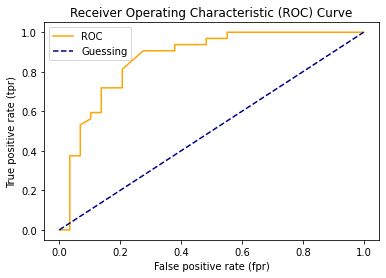

In [84]:
#Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
  """
  Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
  """
  # Plot a roc curve
  plt.plot(fpr,tpr, color = "orange", label = "ROC")
  # Plot line with no predictive power (baseline)
  plt.plot([0,1], [0,1], color = "darkblue", linestyle = "--", label= "Guessing")

  # Customize the plot
  plt.xlabel("False positive rate (fpr)")
  plt.ylabel("True positive rate (tpr)")
  plt.title ("Receiver Operating Characteristic (ROC) Curve")
  plt.legend()
  plt.show()

plot_roc_curve(fpr, tpr)

In [85]:
from sklearn.metrics import roc_auc_score #auc (area under cruve)

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

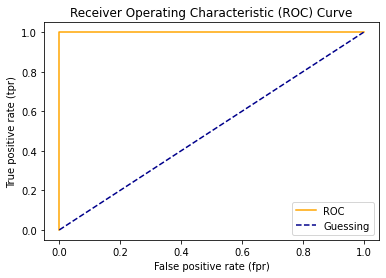

In [86]:
# Plot perfect ROC curve and AUC score
fpr, tpr, threshoulds = roc_curve(y_test, y_test)
plot_roc_curve(fpr,tpr)

In [87]:
# Perfect AUC score, if it's 1 is that every thing is TP or FP
roc_auc_score(y_test,y_test)

1.0

**Reading Extension:** ROC Curve + AUC

When you first encounter them, ROC Curve and AUC (area under curve) metrics can be a little confusing. But not to worry, with a little practice, they'll start to make sense.

In a nutshell, what you should remember is:

* ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

* The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

* The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.





### **3.Confusion Matrix**

The next way to evaluate a classification model is by using a confusion matrix

A confusion matrix is a quick way to **compare the labels a model predicts** and the **actual labels it was supposed to predict**.

In essence, this gives you an idea of where the model is getting confused.

See here --> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [88]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds) #y_test == y_true

#were the model is getting confused is on the diagonal of "6" 
#the correct is the diagonal

array([[23,  6],
       [ 6, 26]])

In [89]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, 
            y_preds,
            rownames = ["Actual Labels"],
            colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


![title](https://i1.wp.com/dataaspirant.com/wp-content/uploads/2020/08/3_confusion_matrix.png?ssl=1)

In [90]:
24 + 5 + 8 + 24

#8 False negatives
#5 False Positives

61

In [91]:
len(X_test)

61

In [92]:
# How to install a conda package into the current enviroment from a Jupitor Notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

/bin/bash: conda: command not found


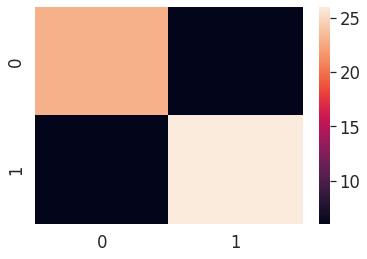

In [93]:
# Make our confusion matrix more visual with Seabrn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale = 1.5)

# Create a confusion matriz
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat)

In [94]:
# We want numbers in the confusion matrix 

#### Creating a confusion matrix using Scikit-Learn

To use the new methods of creating a confusion matrix with Scikit-Learn you will need scklearn version 1.0+

In [95]:
import sklearn
sklearn.__version__

'1.0.2'

###There are two options:

###OPTION 1:

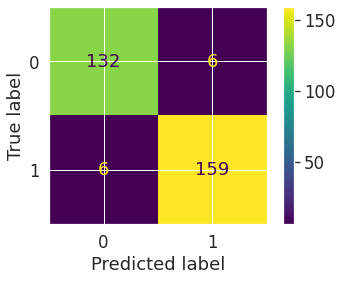

In [96]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = clf, X=X, y=y)

In [97]:
# We have more values because we are passing the whole data X and y


###OPTION 2:

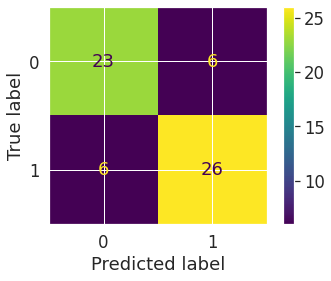

In [98]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

### 4.Classification Report

In [99]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

#our model is balanced (support is 29/32 )

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which werea actually correct. A model which produces no false positives has a precision of 1.0

* **Recall** - Indicates the proportion of actual postives which were correctly classified. A model which produces no false negatives has a recall of 1.0

* **F1 Score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0

* **Support** - The number of samples each metric was calculated on

* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0

* **Mactro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't class imbalance into account, so of you do have class imbalances, pay attention to this metric.

* **Weighted avg** - Short for weigheted average, the weightened average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples)



In [100]:
# Where precision and recall become valuable

# Here we have massive clase UNBALANCED --> only one example where the label will be 1

disease_true = np.zeros(10000)
disease_true[0] = 1 #only one positive case

disease_preds = np.zeros(10000) #model predicts every case as 0 (it misses the 1 prediction)

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [101]:
#accuracy is 0.999

Check --> Model evalutation classification scikit-learn --> https://scikit-learn.org/stable/modules/model_evaluation.html

##4.2.2  Regression model evalutation metrics

Model evalutation metrics documentantion --> https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are🇰

1. R^2 or coefficient of determination
2. Mean Absolut error (MAE)
3. Mean Squared Error (MSE)


### 4.2.2.1.Evalutating a Regression Model 1 (R2 Score)

**R^2:** Compares your predicitons to the mean of the targets. Values can range for negative infinity (a very poor model) to 1. For example, example if all your model does it predict the  mean of the targets, it's R^2 value will be 0. And if your model perfectly preficts a range of numbers it's R^2 value would be 1. 

In [102]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis = 1)
y= housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)


RandomForestRegressor()

In [103]:
model.score(X_test, y_test) #the value we get is R^2

0.999999302094669

In [104]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [105]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [106]:
y_test.mean() #our model just predicted 2.05 for all this values, we will get a score of 0.99

2.0550030959302275

In [107]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean()) #fill each sample wiht the y_test.mean()

In [108]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [109]:
r2_score(y_true= y_test,
         y_pred = y_test_mean)

0.0

In [110]:
#We are evalutating to see how well is doing at predicting the target value from the features
r2_score(y_true= y_test,
         y_pred = y_test)

1.0

### 4.2.2.3 Evalutating a Regression Model 2 (MAE)

**Mean Absolut Error (MAE)** : is the average of the absolut differences between predicitons and actual values.
It gives you an idea of how wrong your models predicitons are.

In [111]:
#MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae #on average each on of our predictions (y_pred) is +- 0.000190 the y_test value

0.00019074459786971705

In [112]:
y_preds

array([0.47714, 0.45555, 5.00001, ..., 5.00001, 0.72296, 1.51502])

In [113]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [114]:
df = pd.DataFrame(data = {"Actual values": y_test, "Predicted values": y_preds})
df["Differences"] = df["Predicted values"] - df["Actual values"]
df.head(10)

,Actual values,Predicted values,Differences
20046,0.47700,0.47714,1.400000e-04
3024,0.45800,0.45555,-2.450000e-03
15663,5.00001,5.00001,3.019807e-14
20484,2.18600,2.18608,8.000000e-05
9814,2.78000,2.78006,6.000000e-05
13311,1.58700,1.58688,-1.200000e-04
7113,1.98200,1.98184,-1.600000e-04
7668,1.57500,1.57500,-4.440892e-16
18246,3.40000,3.39997,-3.000000e-05
5723,4.46600,4.46650,5.000000e-04


In [115]:
df["Differences"].mean()

-1.0449055231272883e-05

In [116]:
#MAE using abs and differences 
np.abs(df["Differences"].mean()) #aqui ens hauria de donar el mateix valor que a dalt MAE (crec que no em dona bé...)

1.0449055231272883e-05

### 4.2.2.4 Evaluating a Regression Model 3 (MSE)

**Mean Squared Error (MSE)** : is the mean of the square of the errors between actual and predictes values

In [117]:
# MSE
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.145414116255094e-07

In [118]:
df["Squared differences"] = np.square(df["Differences"])
df.head()

,Actual values,Predicted values,Differences,Squared differences
20046,0.47700,0.47714,1.400000e-04,1.960000e-08
3024,0.45800,0.45555,-2.450000e-03,6.002500e-06
15663,5.00001,5.00001,3.019807e-14,9.119232e-28
20484,2.18600,2.18608,8.000000e-05,6.400000e-09
9814,2.78000,2.78006,6.000000e-05,3.600000e-09


In [119]:
# Calculate MSE by hand
squared = np.square(df["Differences"])
squared.mean()

9.145414116255127e-07

In [120]:
df_large_error = df.copy()
df_large_error.iloc[0]["Squared differences"] = 16

In [121]:
df_large_error.head() #no se'm actualitza el valor de la "Squared differences" a la taula, no em surt el 16, sino el 1.906...

,Actual values,Predicted values,Differences,Squared differences
20046,0.47700,0.47714,1.400000e-04,1.600000e+01
3024,0.45800,0.45555,-2.450000e-03,6.002500e-06
15663,5.00001,5.00001,3.019807e-14,9.119232e-28
20484,2.18600,2.18608,8.000000e-05,6.400000e-09
9814,2.78000,2.78006,6.000000e-05,3.600000e-09


In [122]:
# Calculate MSE with large error
df_large_error["Squared differences"].mean()

0.0038768835289112605

In [123]:
df_large_error.iloc[1:100] = 20
df_large_error

,Actual values,Predicted values,Differences,Squared differences
20046,0.47700,0.47714,1.400000e-04,1.600000e+01
3024,20.00000,20.00000,2.000000e+01,2.000000e+01
15663,20.00000,20.00000,2.000000e+01,2.000000e+01
20484,20.00000,20.00000,2.000000e+01,2.000000e+01
9814,20.00000,20.00000,2.000000e+01,2.000000e+01
...,...,...,...,...
15362,2.63300,2.63289,-1.100000e-04,1.210000e-08
16623,2.66800,2.66768,-3.200000e-04,1.024000e-07
18086,5.00001,5.00001,3.019807e-14,9.119232e-28
2144,0.72300,0.72296,-4.000000e-05,1.600000e-09


#SUMMARY OF ML MODEL EVALUATION



1) CLASSIFICATION MODEL EVALUTATION metrics/techniques 
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

* **Confusion matrix** - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

* **Cross-validation** - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

* **Classification report **- Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

* **OC Curve** - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

* **Area Under Curve (AUC) Scor**e - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

***Which classification metric should you use?***

* **Accuracy **is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

* **Precision** and recall become more important when classes are imbalanced.

* **If false-positive predictions** are worse than false-negatives, aim for higher precision.

* If **false-negative** predictions are worse than false-positives, aim for higher recall.

* **F1-score** is a combination of precision and recall.

* A **confusion matrix** is always a good way to visualize how a classification model is going.



2) REGRESSION MODEL EVALUTATION metrics/techniques

* **R^2 (pronounced r-squared)** or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

* **Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

* **Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

***Which regression metric should you use?***

* **R2** is similar to **accuracy**. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

* **MAE** gives a better indication of how far off each of your model's predictions are on average.

* As for **MAE** or **MSE**, because of the way **MSE** is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

  * **Pay more attention to MAE**: When being $10,000 off is twice as bad as being $5,000 off.

  * **Pay more attention to MSE**: When being $10,000 off is more than twice as bad as being $5,000 off.

##4.3 Evalutating A Model with Cross Validation and Scoring parameter

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators = 100)

In [125]:

np.random.seed(42)

# Cross-validation accuracy
cv_acc = cross_val_score(clf, X , y , cv=5, scoring = None) #split X and y in 5 train-test sets, repeting it 5 times, 5 diferent scores --> make an average
# if scoring =None, estimators default scoring evalutation metric is used (accuracy for classification models)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [126]:
# Cross-validated accuracy
print(f'The cross-validated accuracy is : {np.mean(cv_acc)*100 :.2f}%')

The cross-validated accuracy is : 82.48%


In [127]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X , y , cv=5, scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [128]:
print(f'The cross-validated accuracy is : {np.mean(cv_acc)*100 :.2f}%') #podem comprobar que ens dona el mateix, es a dir, per defecte si el scoring= None ens calcula la accuracy

The cross-validated accuracy is : 82.48%


In [129]:
#Precision
np.random.seed(42) #same splits each time
cv_precision = cross_val_score(clf, X , y , cv= 5, scoring = "precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [130]:
#we can see that there are 5 different values: depending on the split of the data our model perferoms better in one split (0.935) than another (0.763)
#it depends on the split 

In [131]:
# Cross-validated precision
print(f'The cross-validated precision is : {np.mean(cv_precision)}')

The cross-validated precision is : 0.8329547346025924


In [132]:
#  Recall  - Indicates the proportion of actual positives which were correclty classified.
cv_recall = cross_val_score(clf, X, y , cv= 5, scoring = "recall")
cv_recall

array([0.87878788, 0.84848485, 0.78787879, 0.81818182, 0.87878788])

In [133]:
# Cross-validated recall
print(f'The cross-validated recall is : {np.mean(cv_recall)}')

The cross-validated recall is : 0.8424242424242424


Let's see the scoring parameter being in a regression

In [134]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X = housing_df.drop("target", axis = 1)
y = housing_df["target"]

model = RandomForestRegressor(n_estimators = 100)

In [135]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X , y , cv=3, scoring = None) #split X and y in 3 train-test sets, repeting it 3 times, 3 diferent scores --> make an average
np.mean(cv_r2)

0.9999994540382956

In [136]:
cv_r2

array([0.99999908, 0.99999965, 0.99999963])

In [137]:
# Mean squared error
cv_mse = cross_val_score(model, X, y, cv= 5, scoring= "neg_mean_squared_error")
np.mean(cv_mse)

-5.122660023362509e-07

In [138]:
cv_mse

array([-1.24694186e-06, -2.22519741e-07, -5.71865727e-07, -1.80963782e-07,
       -3.39038899e-07])

In [139]:
# Mean absolut error
cv_mae = cross_val_score(model, X, y , cv=5, scoring = "neg_mean_absolute_error")
cv_mae

array([-0.0002279 , -0.00014909, -0.00020632, -0.00014778, -0.00023095])

## 4.4 Using different Evaluation Metrics with Scikit-Learn functionss

The 3rd way to evalute scikit-learn ML models/estimators is to using "sklearn.metrics" --> https://scikit-learn.org/stable/modules/classes#sklearn-metrics-metrics

FOR CLASSIFICATION MODEL - only 1 single train_test split

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & Y
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= 0.2)

# Create the model
clf = RandomForestClassifier()

# Fit the model
clf.fit(X_train, y_train)

#Make predicitions
y_preds = clf.predict(X_test)

# Evaluate the model using evaluation funcitions
print("Classifier metrics on the test set")
print(f"Accuracy:{accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision:{precision_score(y_test, y_preds)}")
print(f"Recall:{recall_score(y_test, y_preds)}")
print(f"F1:{f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy:85.25%
Precision:0.8484848484848485
Recall:0.875
F1:0.8615384615384615


FOR REGRESSION MODEL - only 1 single train_test split

In [141]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Create X & Y
X = housing_df.drop("target", axis=1)
y = housing_df

# Split the data
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Create the model
model = RandomForestRegressor()

# Fit the model
model.fit(X_train,y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate the model using evaluation funcitions
print("Classifier metrics on the test set")
print(f"r2 score:{r2_score(y_test, y_preds)}")
print(f"MAE:{mean_absolute_error(y_test, y_preds)}")
print(f"MSE:{mean_squared_error(y_test, y_preds)}")

Classifier metrics on the test set
r2 score:0.5779299568965518
MAE:0.2298360655737705
MSE:0.1052622950819672


# 5.Improving a ML Model

First predicitions = baseline predictions
First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data? (more depth information within each sample)

From a model perspective:
* Is there a model better we can use --> sklearn model map
* Could we improve the current model? 

Hyperparameters vs. Parameters
 - Parameters = model find these paterns in data
 - Hyperparameters = settings on a model you can adjust to improve its ability to find patterns

**3 ways to adjust hyperparameters**
 1. By hand
 2. Randomly with RandomSearchCV
 3. Exhaustiverly with GridSearchCV

In [142]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [143]:
clf.get_params() #these are different hyperparameters that we can adjust in our RandomForestClassifier

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [144]:
#adjusting hyperparameters is like adjusting the temperature of the oven in order to improve the dish
#default parameters --> find patterns well, but we can improve it by adjusting these ones.

### 5.1 Tunning Hyperparameters by hand

3 SETS:

* **Training split** (70-80%) - Course materials 
* **Validation split** (10-15%) - Practice exam
* **Test split** (10-15%) - Final exam

***Generalization:*** The ability for ML model to perfrom well on data it hasn't seen before

![title](https://media.springernature.com/full/springer-static/image/art%3A10.1007%2Fs13244-018-0639-9/MediaObjects/13244_2018_639_Fig8_HTML.png?as=webp)

In [145]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

* 'max_depth'
* 'max_features'
* 'min_samples_leaf'
* 'min_samples_split'
* n_estimators

In [146]:
def evaluate_preds(y_true, y_preds):
  """
  Performs evaluation comparision on y_true labels vs. y_preds labels on classification model
  """
  accuracy = accuracy_score(y_true, y_preds)
  precision = precision_score(y_true, y_preds)
  recall = recall_score(y_true, y_preds)
  f1 = f1_score(y_true, y_preds)
  metric_dict = {"accuracy": round(accuracy,2),
                 "precision": round(precision, 2),
                 "recall": round(recall,2),
                 "f1": round(f1,2)}
  print(f"Acc: {accuracy*100:2f}%")
  print(f"Precision: {precision:2f}")
  print(f"Recall: {recall:2f}")
  print(f"F1 score: {f1:2f}")

  return metric_dict

In [147]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

#Split into X & y
X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) #70% of data
valid_split = round(train_split + 0.15*len(heart_disease_shuffled)) #15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test) 

(212, 45, 46)

![title](https://miro.medium.com/max/875/1*f2KznlrIdj1MeobprVGBtg.png)

In [148]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predicitions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation seet
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.222222%
Precision: 0.814815
Recall: 0.880000
F1 score: 0.846154


{'accuracy': 0.82, 'f1': 0.85, 'precision': 0.81, 'recall': 0.88}

In [149]:
np.random.seed(42)

#Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators= 10)
clf_2.fit(X_train,y_train)

# Make predictions with different hyperparametrs
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.222222%
Precision: 0.840000
Recall: 0.840000
F1 score: 0.840000


In [150]:
# By hand, let's adjunst all the hyperparameters --> Sckitlearn has a methods in built
clf_3= RandomForestClassifier(n_estimators = 100, max_depth= 10)

### 5.2 Tunning Hyperparameters by Scikit-learn built-in function (RandomizedSearchCV)


In [151]:
from sklearn.model_selection import RandomizedSearchCV

# Create a dictionary with the hyperparameters we'd like to adjust as the "keys"
# The values we want to try as the "values" of the dictionary

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}
np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs= -1) #n_jobs = how much of your comptures precssor you want to dedicate 

# Setup RandomizedSearchCV (CV = cross validation)
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter = 10, #number of models to try with different combinations of "grid" parameters
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearch CV version of clf
rs_clf.fit(X_train, y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [152]:
 rs_clf.best_params_ #the best cv-results

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [153]:
# Make predicitions with the best hyperparameters
rs_y_preds= rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.967213%
Precision: 0.774194
Recall: 0.857143
F1 score: 0.813559


In [154]:
#We see that it has not improve by the "manual setting", but we can change the number of iterations, change it to 50 for example